<a href="https://colab.research.google.com/github/Avani10/FastAI-tutorial/blob/master/Classifier_with_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Execute only to download

In [0]:
folder = 'pikachu'
file = 'urls_pikachu2.csv'

In [0]:
folder = 'pichu'
file = 'urls_pichu2.csv'

In [0]:
folder = 'raichu'
file = 'urls_raichu2.csv'

In [0]:
folder = 'jigglypuff'
file = 'urls_jigglypuff2.csv'

In [0]:
path = Path('data/pokemon')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/pokemon/.ipynb_checkpoints'),
 PosixPath('data/pokemon/raichu'),
 PosixPath('data/pokemon/pikachu'),
 PosixPath('data/pokemon/jigglypuff'),
 PosixPath('data/pokemon/pichu')]

In [0]:
classes = ['jigglypuff','pichu','pikachu','raichu']

In [0]:
download_images(path/folder/file, dest)

In [0]:
download_images(path/folder/file, dest, max_pics=20, max_workers=0)

In [0]:
path1=path/folder

In [0]:
len(path1.ls())

163

In [0]:
path1

PosixPath('data/pokemon/pikachu')

In [0]:
cp 'data' -r 'gdrive/My Drive/Colab Notebooks/data'

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

jigglypuff


pichu


pikachu


raichu


# Move data from drive which was moved previously

In [0]:
cp 'gdrive/My Drive/Colab Notebooks/data' -r 'data'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['jigglypuff', 'pichu', 'pikachu', 'raichu']

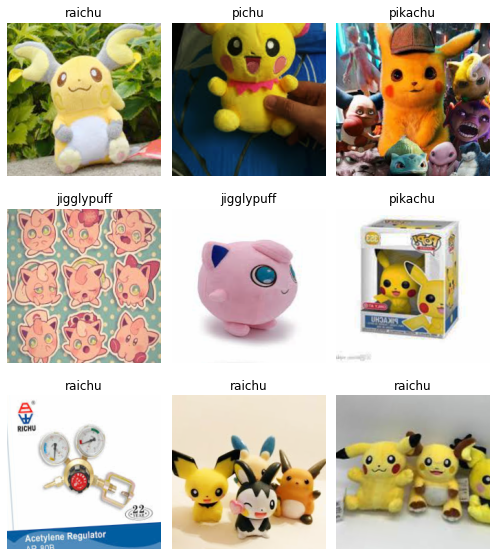

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.066311,1.286112,0.421875,00:06
1,1.495724,1.271763,0.281250,00:05
2,1.187754,1.138738,0.234375,00:05
3,0.998471,1.111101,0.250000,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


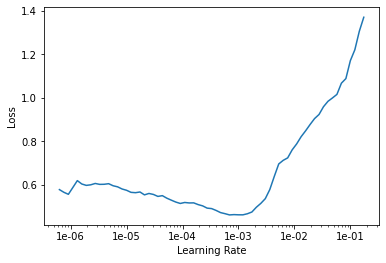

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.104244,3.053653,0.421875,00:06
1,1.041328,1.746183,0.359375,00:06


In [21]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.552799,1.070628,0.218750,00:06
1,0.451818,0.843918,0.187500,00:06
2,0.406440,1.541654,0.312500,00:06
3,0.376672,1.723904,0.265625,00:06
4,0.360520,1.541122,0.250000,00:06
5,0.324873,1.298307,0.312500,00:06
6,0.279238,0.900465,0.218750,00:06
7,0.231770,0.816317,0.218750,00:06
8,0.199302,0.775648,0.203125,00:06
9,0.171120,0.764136,0.187500,00:06


In [24]:
learn.fit_one_cycle(10, max_lr=slice(1e-40,1e-35))

epoch,train_loss,valid_loss,error_rate,time
0,0.082591,0.776226,0.187500,00:06
1,0.061974,0.764101,0.171875,00:06
2,0.059864,0.776091,0.171875,00:06
3,0.056161,0.770455,0.171875,00:06
4,0.064919,0.767017,0.171875,00:06
5,0.063933,0.776559,0.171875,00:06
6,0.069365,0.772118,0.171875,00:06
7,0.072816,0.762890,0.171875,00:06
8,0.069461,0.765936,0.171875,00:06
9,0.062949,0.761550,0.171875,00:06


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

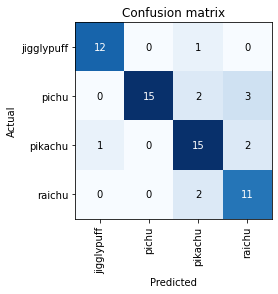

In [28]:
interp.plot_confusion_matrix()

In [29]:
interp.most_confused()

[('pichu', 'raichu', 3),
 ('pichu', 'pikachu', 2),
 ('pikachu', 'raichu', 2),
 ('raichu', 'pikachu', 2),
 ('jigglypuff', 'pikachu', 1),
 ('pikachu', 'jigglypuff', 1)]

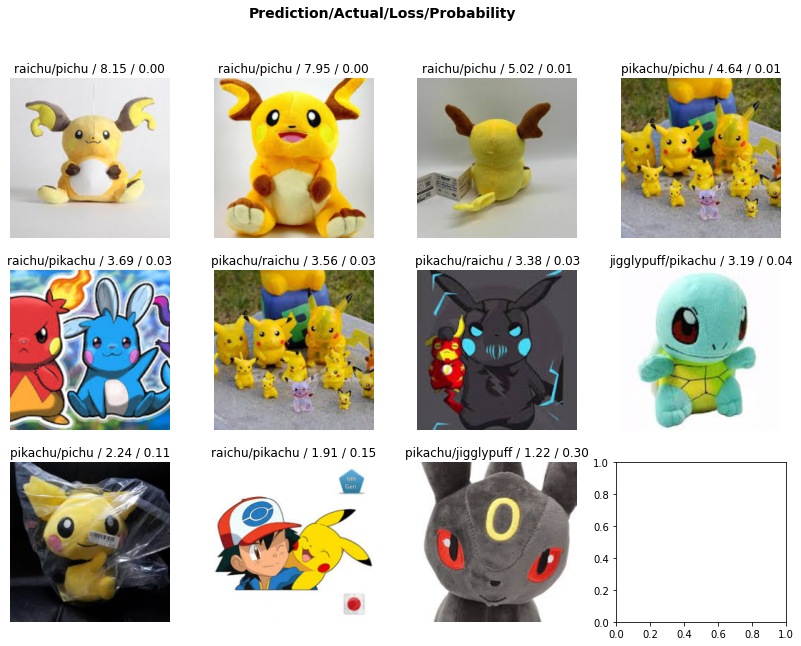

In [34]:
interp.plot_top_losses(11, figsize=(14,10))

In [0]:
cp 'data/pokemon/models' -r 'gdrive/My Drive/Colab Notebooks/data/models'

# Cleaning Up

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [40]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

# Putting your model in production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

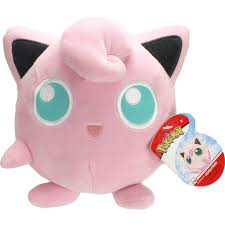

In [55]:
img = open_image(path/'jigglypuff'/'00000017.jpg')
img

In [0]:
learn = load_learner(path)

In [57]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category jigglypuff